## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [2]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [3]:
fList = []
with open("Ly Data/huang_ws.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '國昌', '行政院', '院長', '部會', '首長', '同仁', '院長', '本席', '稱呼', '學長', '美國', '康乃爾', '大學', '土木工程', '博士', '學位', '本席', '畢業', '法學院', 'civil', 'environmental', 'engineering', '對面', '法學院', '學院', '建築物', 'civil', 'environmental', 'engineering', '同仁', '有趣', '土木工程', '建築物', '樸素', '院長', '台南', '賑災', '勇於', '任事', '表現', '院長', '率領', '行政', '團隊', '高度', '評價', '院長', '善政', '委員', '不敢當', '委員', '國昌', '質詢', '內容', '攸關', '我國', '整體', '發展', '院長', '院長', '善政', '不敢當', '委員', '國昌', '院長', '我國', '核廢料', '台灣', '發展', '核電', '政策', '面臨', '共業', '嚴肅', '請教', '院長', '院長', '提出', '行政院', '報告', '政府', '核廢料', '政策', '請問', '記載', '地方', '院長', '善政', '剛剛', '口頭', '報告', '委員', '國昌', '本席', '目前', '行政院', '完整', '報告', '總共', '簡單', '請問', '核廢料', '著墨', '部長', '振中', '報告', '委員', '核廢料', '長期', '中期', '短期', '目標', '委員', '國昌', '回答', '請問', '記載', '行政院', '施政報告', '行政院', '針對', '目前', '事項', '時間', '精力', '做出來', '本席', '反覆', '閱讀', '內容', '院長', '報告', '內容', '核廢料', '隻字', '本席', '經濟部', '官員', '施政報告', '核廢料', '政策', '面對', '著墨', '本席', '敘述', '事實', '贊不贊成', '院長', '善政', '施政報告', '

### creat dictionary for corpus

In [4]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(20413 unique tokens: ['act', 'alternative', 'baseline', 'civil', 'engineering']...)
------------------------------


### creat corpus need for Topic Modeling

In [5]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 2), (3, 2), (4, 2), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 12), (31, 1), (32, 2), (33, 1), (34, 1), (35, 2), (36, 2), (37, 1), (38, 1), (39, 8), (40, 1), (41, 2), (42, 7), (43, 1), (44, 1), (45, 9), (46, 3), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 2), (54, 3), (55, 1), (56, 3), (57, 1), (58, 1), (59, 8), (60, 1), (61, 5), (62, 1), (63, 2), (64, 1), (65, 4), (66, 1), (67, 1), (68, 1), (69, 2), (70, 2), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 7), (77, 1), (78, 1), (79, 12), (80, 2), (81, 7), (82, 1), (83, 1), (84, 1), (85, 1), (86, 3), (87, 6), (88, 1), (89, 1), (90, 1), (91, 5), (92, 1), (93, 1), (94, 1), (95, 1), (96, 5), (97, 5), (98, 1), (99, 2), (100, 5), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (1

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [6]:
mallet_path = "/users/twcty/Desktop/mallet-2.0.8/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("Ly Data/huang_ws.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('委員', 0.039996566818298857), ('教育部', 0.028323749034417648), ('行政', 0.016050124452836666), ('學校', 0.012531113209166595), ('文忠', 0.01175864732640975), ('老師', 0.011415329156295596), ('大學', 0.011243670071238521), ('台大', 0.010385374645953138), ('國昌', 0.009698738305724831), ('相關', 0.008840442880439447), ('審核', 0.00823963608273968), ('學生', 0.0074671701999828345), ('教授', 0.006866363402283066), ('契約', 0.006780533859754527), ('違法', 0.006608874774697451), ('次長', 0.006179727062054759), ('程序', 0.0059222384344691445), ('關係', 0.005836408891940606), ('騰蛟', 0.005664749806883529), ('辦法', 0.005493090721826453)]

strTM =  1[('委員', 0.06167094937148413), ('國昌', 0.043683589138134596), ('台電', 0.022084867004653102), ('榮津', 0.020209736787276895), ('經濟部', 0.014584346135148274), ('報告', 0.0106951871657754), ('環保署', 0.009514549621501493), ('副署長', 0.009097854017640114), ('評估', 0.008611709146468504), ('提出', 0.007569970136815056), ('署長', 0.007569970136815056), ('原能會', 0.0072227238002639076), ('程序', 0.00694


 Coherence Score:  0.41846795313971513


### Finding the optimal number of topics

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [8]:
lim=36; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.3542951269029552
Num_topics:  6  Coherence Score=  0.4141076161506911
Num_topics:  9  Coherence Score=  0.42316365866475847
Num_topics:  12  Coherence Score=  0.4286243731656838
Num_topics:  15  Coherence Score=  0.4080067401450553
Num_topics:  18  Coherence Score=  0.4297429214984254
Num_topics:  21  Coherence Score=  0.43955943166052897
Num_topics:  24  Coherence Score=  0.4421702310550594
Num_topics:  27  Coherence Score=  0.43543661166075504
Num_topics:  30  Coherence Score=  0.43124583062122124
Num_topics:  33  Coherence Score=  0.42514322599547744


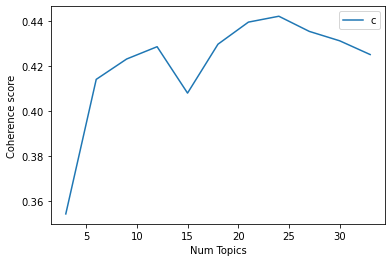

In [9]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [10]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.3543
Num Topics = 6  has Coherence Value of 0.4141
Num Topics = 9  has Coherence Value of 0.4232
Num Topics = 12  has Coherence Value of 0.4286
Num Topics = 15  has Coherence Value of 0.408
Num Topics = 18  has Coherence Value of 0.4297
Num Topics = 21  has Coherence Value of 0.4396
Num Topics = 24  has Coherence Value of 0.4422
Num Topics = 27  has Coherence Value of 0.4354
Num Topics = 30  has Coherence Value of 0.4312
Num Topics = 33  has Coherence Value of 0.4251
Optimal Topic Num = 24  Highest Value = 0.4421702310550594


###  Select the model and print the topics

In [11]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.049*"公司" + 0.030*"委員" + 0.021*"國昌" + 0.019*"副主任委員" + 0.016*"臺灣" + '
  '0.013*"董事" + 0.012*"中國" + 0.010*"投資" + 0.009*"洗錢" + 0.008*"國發會" + '
  '0.008*"揭露" + 0.008*"台灣" + 0.007*"第一" + 0.007*"違法" + 0.007*"承諾" + 0.006*"主委" '
  '+ 0.006*"副主委" + 0.006*"美伶" + 0.006*"申報" + 0.005*"負責" + 0.005*"負責人" + '
  '0.005*"股票" + 0.005*"透過" + 0.005*"不實" + 0.005*"目前"'),
 (1,
  '0.065*"委員" + 0.045*"國昌" + 0.015*"政府" + 0.014*"廠商" + 0.012*"公司" + '
  '0.011*"副署長" + 0.011*"人事" + 0.011*"機關" + 0.010*"局長" + 0.009*"經濟部" + '
  '0.008*"補助" + 0.007*"違法" + 0.007*"違反" + 0.007*"執行" + 0.007*"辦法" + '
  '0.006*"勞動部" + 0.006*"金額" + 0.006*"回答" + 0.006*"審查" + 0.006*"當初" + '
  '0.006*"能傑" + 0.005*"認定" + 0.005*"同仁" + 0.005*"報告" + 0.005*"關係"'),
 (2,
  '0.040*"委員" + 0.036*"國昌" + 0.029*"經濟部" + 0.025*"部長" + 0.023*"榮津" + '
  '0.021*"台電" + 0.014*"評估" + 0.012*"原能會" + 0.010*"計畫" + 0.010*"土地" + '
  '0.008*"董事長" + 0.008*"負責" + 0.007*"地方" + 0.007*"申請" + 0.007*"第一" + '
  '0.007*"發展" + 0.007*"報告" + 0.006*"電廠" + 0.006*"曉星" + 0.005*"觀光"

### Finding the dominant topic in each sentence

In [12]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.4388,"委員, 國昌, 台電, 榮津, 經濟部, 報告, 環保署, 副署長, 評估, 署長","[委員, 國昌, 行政院, 院長, 部會, 首長, 同仁, 院長, 本席, 稱呼, 學長, ..."
1,1,15.0,0.4646,"委員, 國昌, 董事長, 金管會, 銀行, 主任委員, 報告, 主委, 立雄, 金融","[委員, 國昌, 列席, 官員, 同仁, 早上, 委員, trf, 商品, 銷售, 提出, ..."
2,2,2.0,0.4292,"本席, 委員, 發生, 處分, 國勇, 地方, 行政, 國昌, 裁罰, 同仁","[委員, 國昌, 列席, 官員, 同仁, 主委, 算是, 法學界, 前輩, 稱呼, 老師, ..."
3,3,13.0,0.4252,"所得, 虞哲, 委員, 財政部, 改革, 勞動部, 目前, 勞工, 提出, 稅率","[委員, 國昌, 列席, 官員, 同仁, 部長, 關鍵, 時刻, 租稅, 正義, 角度, 有..."
4,4,4.0,0.6536,"委員, 國昌, 數字, 主計, 投資, 總裁, 政策, 台灣, 經濟, 澤民","[委員, 國昌, 列席, 官員, 同仁, 中央銀行, 結緣, 法制, 人員, 高考, 中央銀..."
5,5,4.0,0.6151,"委員, 國昌, 數字, 主計, 投資, 總裁, 政策, 台灣, 經濟, 澤民","[委員, 國昌, 列席, 官員, 同仁, 主計, 特別, 撥空, 本席, 辦公室, 主計總處..."
6,6,3.0,0.2681,"委員, 國昌, 經濟部, 署長, 建榮, 土地, 消防, 財政部, 政府, 執行","[委員, 國昌, 列席, 官員, 同仁, 請教, 部長, 部長, 提出, 書面, 報告, 書..."
7,7,17.0,0.1933,"計畫, 政府, 市政府, 地方, 新北, 中央, 委員, 賀陳, 目前, 推動","[委員, 國昌, 同仁, 委員, 國昌, 有鑒於, 行政院, 計畫, 目前, 隸屬, 財團法..."
8,8,13.0,0.4141,"所得, 虞哲, 委員, 財政部, 改革, 勞動部, 目前, 勞工, 提出, 稅率","[委員, 國昌, 列席, 官員, 同仁, 延續, 禮拜, 主計總處, 質詢, 內容, 複述,..."
9,9,6.0,0.4053,"委員, 國昌, 處長, 局長, 檢測, 關係, 求償, 資料, 協助, 報告","[委員, 國昌, 列席, 官員, 同仁, 主委, 政大, 選舉, 研究, 中心, 老師, 本..."


### Find the most representative document for each topic

In [13]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6742,"委員, 教育部, 行政, 學校, 文忠, 老師, 大學, 台大, 國昌, 相關","[委員, 國昌, 列席, 官員, 同仁, 質詢, 請教, 次長, 大學, 教授, 程序, 違..."
1,1.0,0.6451,"委員, 國昌, 台電, 榮津, 經濟部, 報告, 環保署, 副署長, 評估, 署長","[委員, 國昌, 列席, 官員, 同仁, 昨天, 深澳, 電廠, 環差, 罕見, 北市, 臺..."
2,2.0,0.5287,"本席, 委員, 發生, 處分, 國勇, 地方, 行政, 國昌, 裁罰, 同仁","[委員, 國昌, 列席, 官員, 同仁, 社環, 委員會, 召委, 勞動檢查, 安排, 報告..."
3,3.0,0.6838,"委員, 國昌, 經濟部, 署長, 建榮, 土地, 消防, 財政部, 政府, 執行","[委員, 國昌, 列席, 官員, 同仁, 紐約, 家具, 案子, 政治, 權力, 政治, 人..."
4,4.0,0.7742,"委員, 國昌, 數字, 主計, 投資, 總裁, 政策, 台灣, 經濟, 澤民","[委員, 國昌, 列席, 官員, 同仁, 中央, 政府, 國庫, 收支, 餘絀, 狀況, 數..."
5,5.0,0.6482,"修正, 條文, 法律, 黨團, 立法, 提出, 時代力量, 程序, 規範, 討論","[委員, 國昌, 同仁, 商業, 事件, 審理, 第七, 濃縮, 條文, 律師, 強制, 代..."
6,6.0,0.6513,"委員, 國昌, 處長, 局長, 檢測, 關係, 求償, 資料, 協助, 報告","[委員, 國昌, 列席, 官員, 同仁, 本席, 請教, 科技部, 部長, 中科, 管理, ..."
7,7.0,0.7025,"公司, 委員, 國昌, 主任委員, 金管會, 立雄, 主委, 局長, 投資, 中國","[委員, 國昌, 列席, 官員, 同仁, 主委, 董事長, 強化, 資本, 投資人, 資本,..."
8,8.0,0.6630,"法務部, 委員, 國昌, 檢察官, 次長, 司法, 犯罪, 清祥, 太三, 地檢署","[委員, 國昌, 列席, 官員, 同仁, 司法, 改革, 過程, 不肖, 法官, 檢察官, ..."
9,9.0,0.6821,"部長, 委員, 國昌, 署長, 報告, 調查, 資料, 時間, 請問, 有沒有","[委員, 國昌, 列席, 官員, 同仁, 部長, 事件, 蔡總, 統說, 徹查, 徹查, 委..."


###  Showing topic distribution across documents

In [14]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,1.0,"委員, 國昌, 台電, 榮津, 經濟部, 報告, 環保署, 副署長, 評估, 署長",21.0,0.0305
1.0,15.0,"委員, 國昌, 董事長, 金管會, 銀行, 主任委員, 報告, 主委, 立雄, 金融",30.0,0.0436
2.0,2.0,"本席, 委員, 發生, 處分, 國勇, 地方, 行政, 國昌, 裁罰, 同仁",27.0,0.0392
3.0,13.0,"所得, 虞哲, 委員, 財政部, 改革, 勞動部, 目前, 勞工, 提出, 稅率",32.0,0.0465
4.0,4.0,"委員, 國昌, 數字, 主計, 投資, 總裁, 政策, 台灣, 經濟, 澤民",34.0,0.0494
...,...,...,...,...
683.0,5.0,"修正, 條文, 法律, 黨團, 立法, 提出, 時代力量, 程序, 規範, 討論",NaN,NaN
684.0,5.0,"修正, 條文, 法律, 黨團, 立法, 提出, 時代力量, 程序, 規範, 討論",NaN,NaN
685.0,16.0,"委員, 國昌, 立場, 中國, 臺灣, 國際, 陸委會, 國家, 副司長, 司長",NaN,NaN
686.0,5.0,"修正, 條文, 法律, 黨團, 立法, 提出, 時代力量, 程序, 規範, 討論",NaN,NaN
